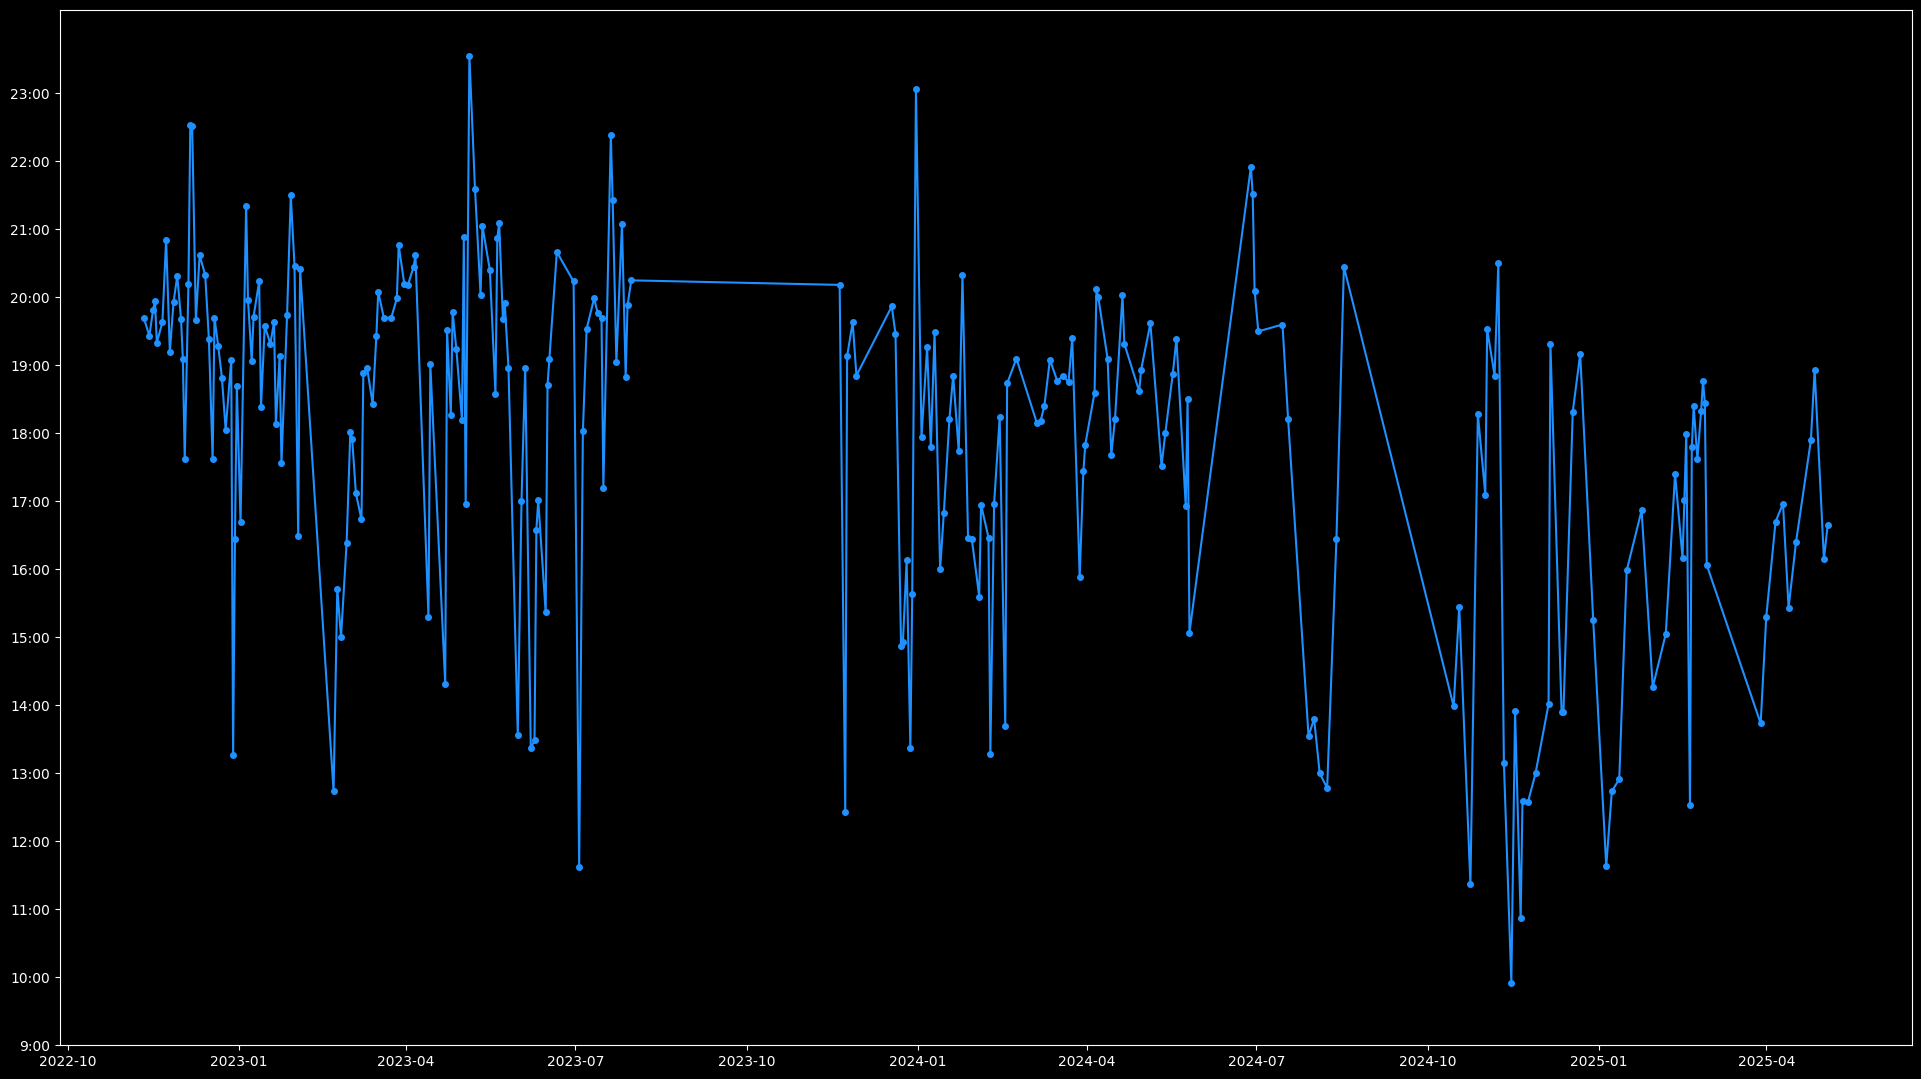

In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df = pd.read_csv('streamdata.csv', parse_dates=['date']).drop_duplicates(subset='date', keep='first').set_index('date').sort_index().query('time >= 5')

fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(df['time'], ax=ax, colors=['dodgerblue'])
yticks = range(int(df['time'].min()), int(df['time'].max()) + 1)
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='')
plt.show()
# TODO каждому дню когда был стрим присвоить значение 1, всем остальным 0. И к этому датасету применить фильтр Калмана.

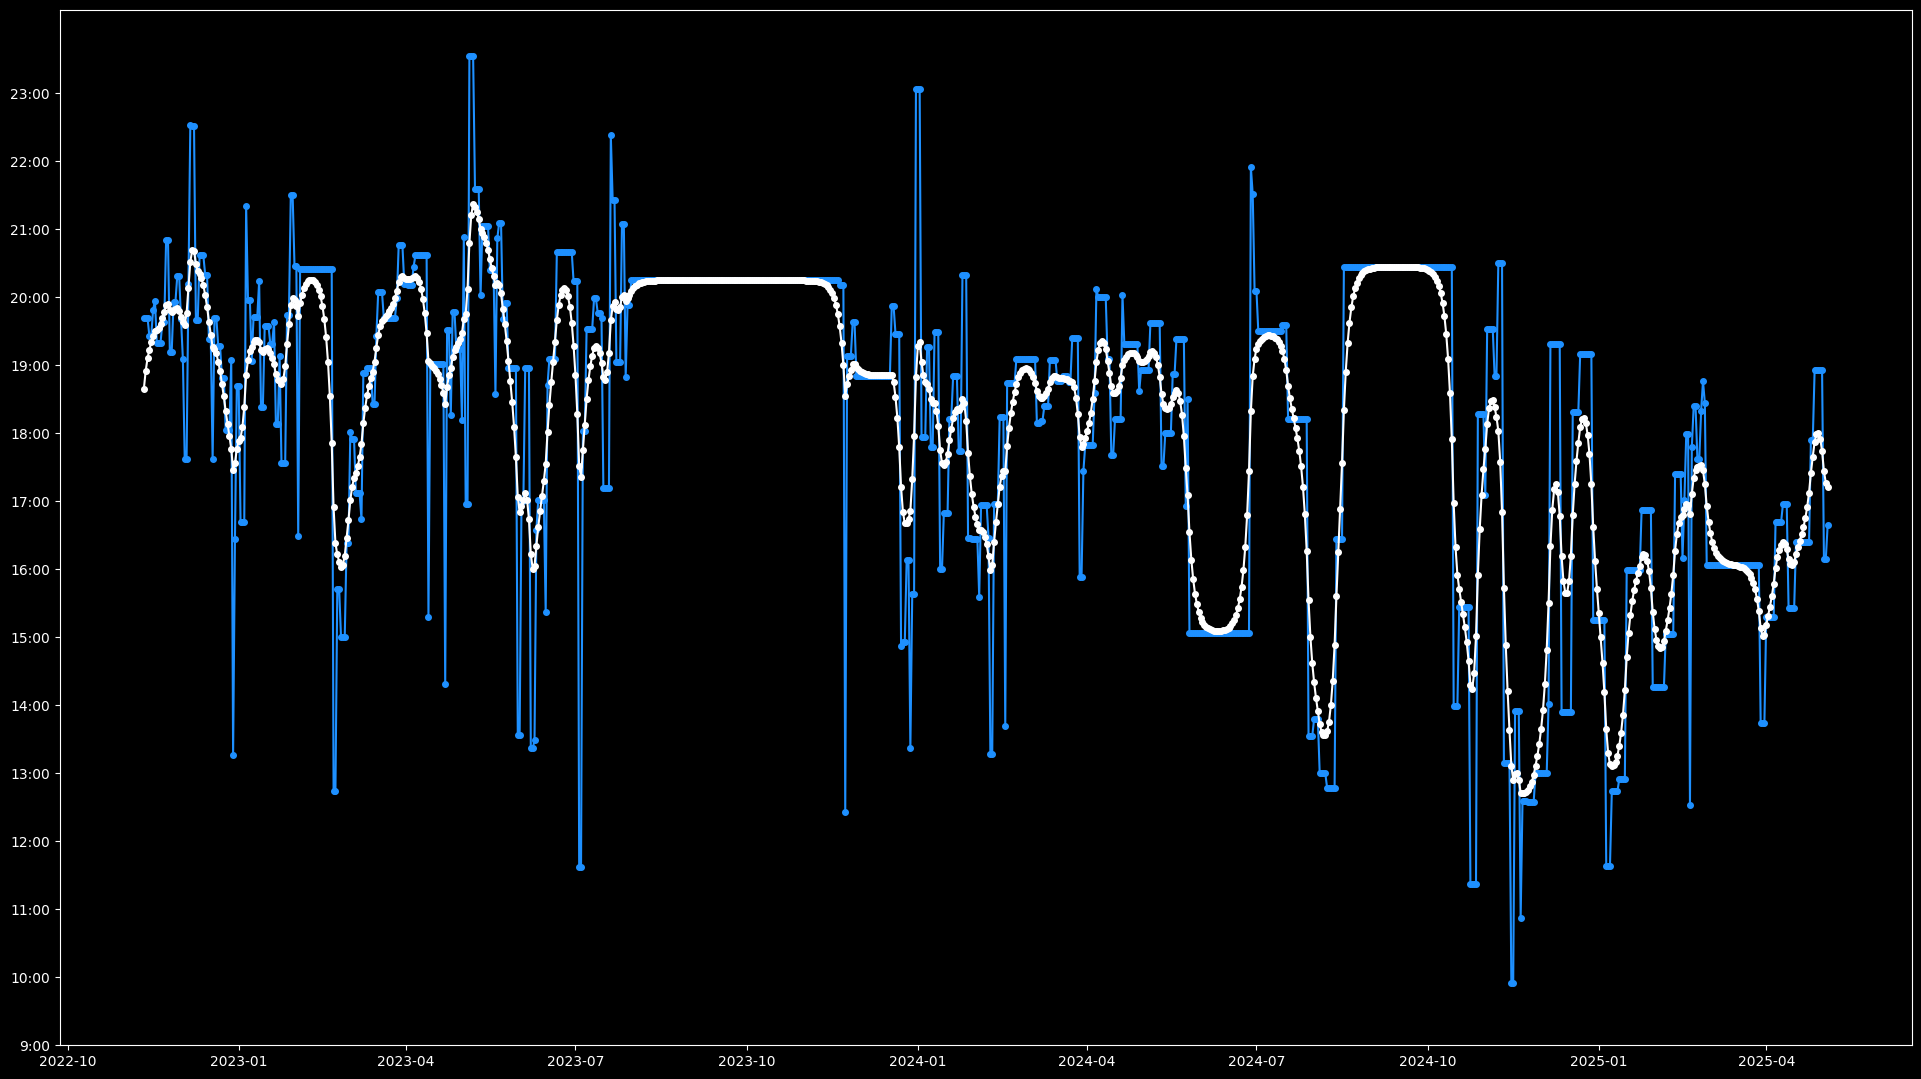

In [3]:
from sktime.transformations.series.kalman_filter import KalmanFilterTransformerPK

df = df.asfreq('D').ffill()

kalman_filter = KalmanFilterTransformerPK (
    state_dim=1,
    denoising=True,
    process_noise=0.1,
    initial_state_covariance=5
)

kalman_filter_df = kalman_filter.fit_transform(df[['time']])

fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(df['time'], kalman_filter_df, ax=ax, colors=['dodgerblue', 'white'])
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='')
plt.show()

c:\Users\prospal\Desktop\Other\Python\Time series forecasting\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\prospal\Desktop\Other\Python\Time series forecasting\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


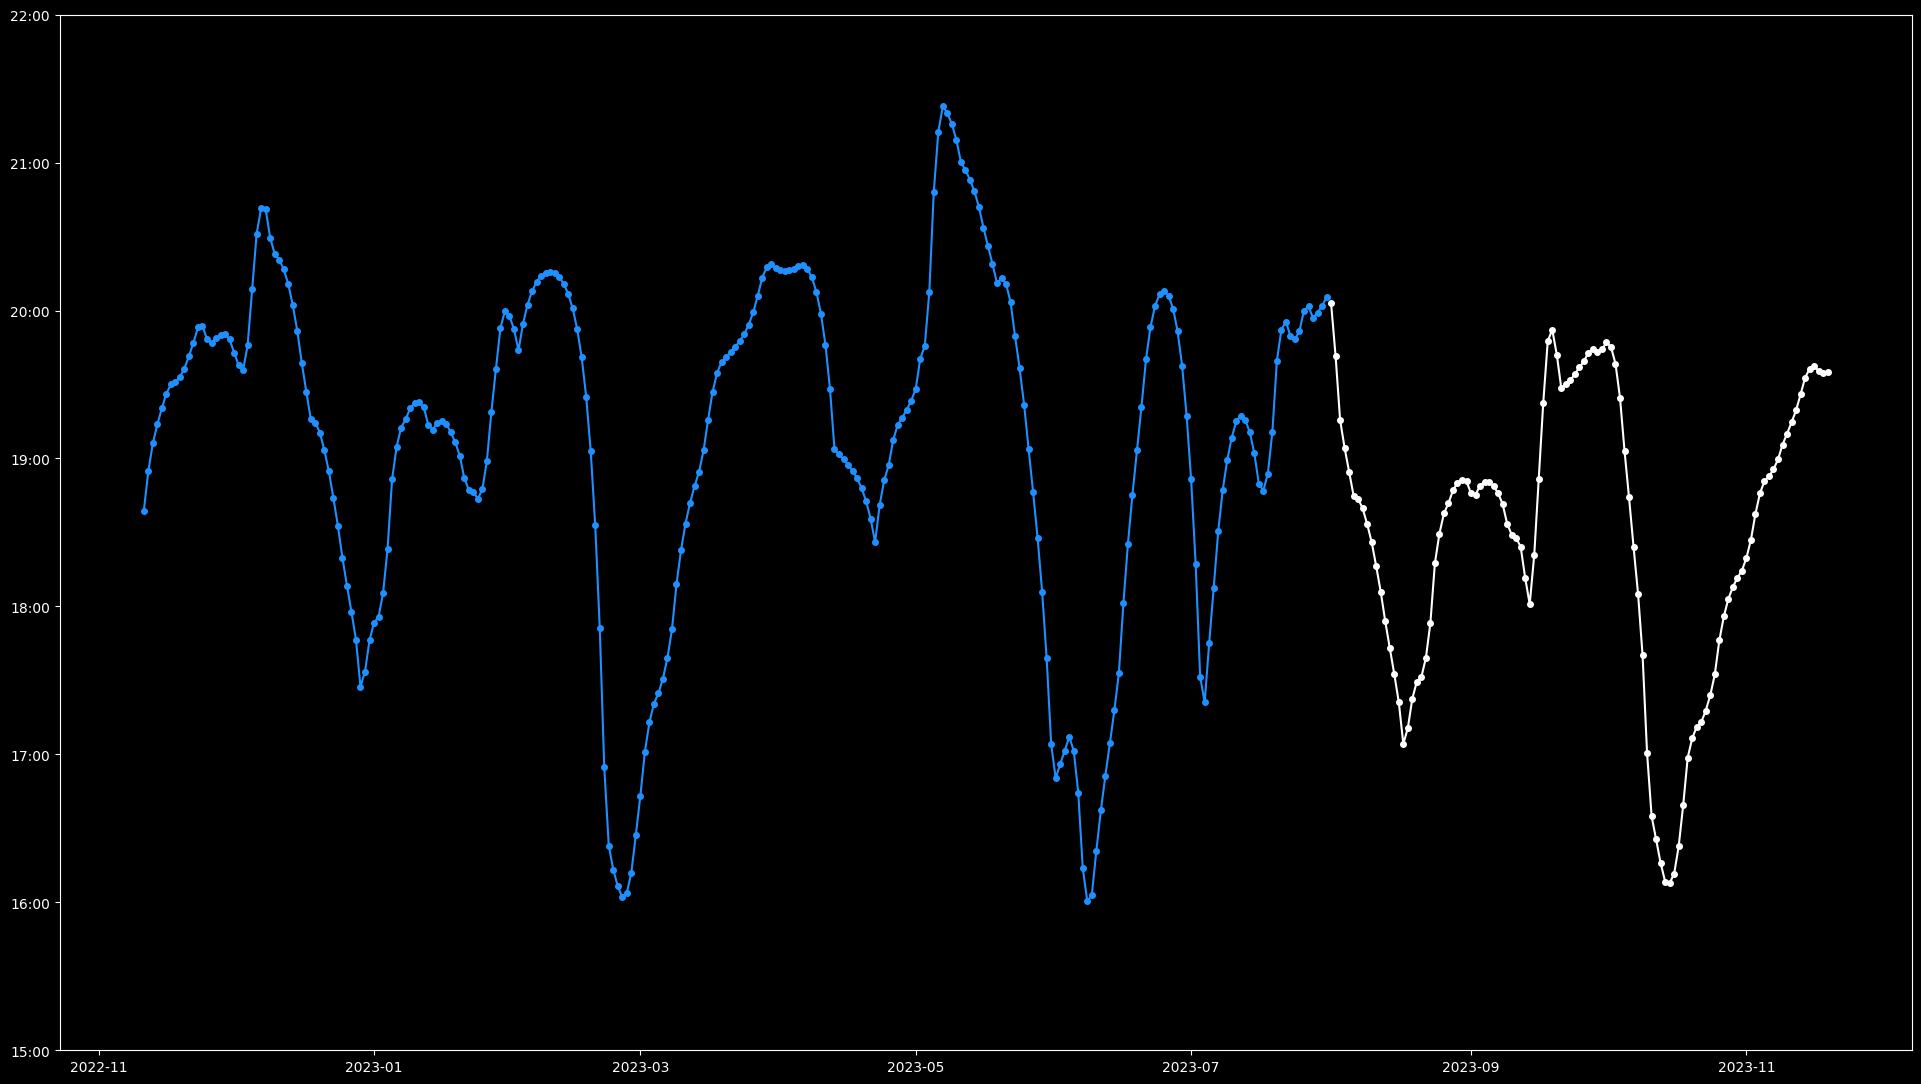

In [4]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.sarimax import SARIMAX

sliced_df = kalman_filter_df.loc[:'2023-07-31']

forecaster = SARIMAX(
    order=(0, 0, 2), 
    seasonal_order=(2, 1, 1, 77),
)

forecaster.fit(sliced_df)
fh = ForecastingHorizon(pd.date_range(start='2023-08-1', end='2023-11-19'))
y_pred = forecaster.predict(fh)
fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(sliced_df, y_pred, ax=ax, colors=['dodgerblue', 'white'])
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='', ylim=(15, 22))
plt.show()

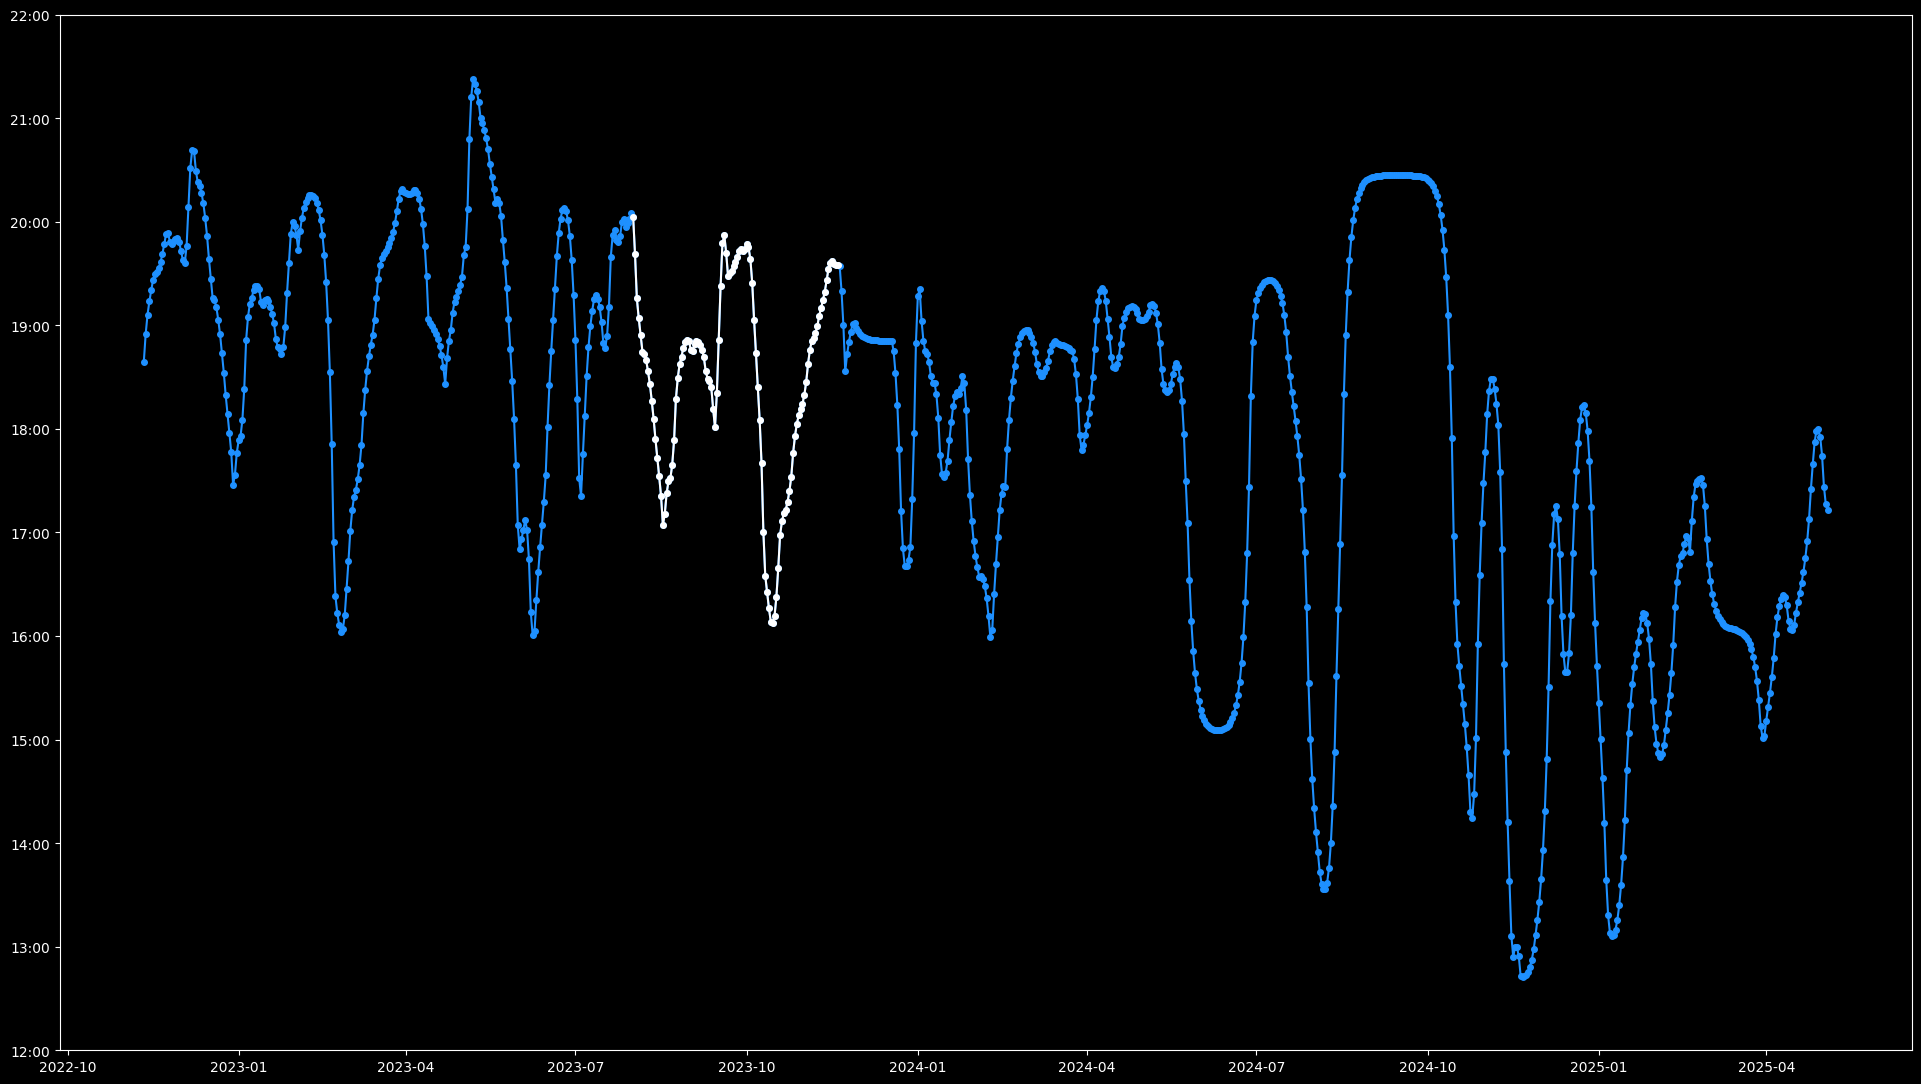

In [5]:
kalman_filter_df.update(y_pred)

fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(kalman_filter_df, y_pred, ax=ax, colors=['dodgerblue', 'white'])
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='', ylim=(12, 22))
plt.show()

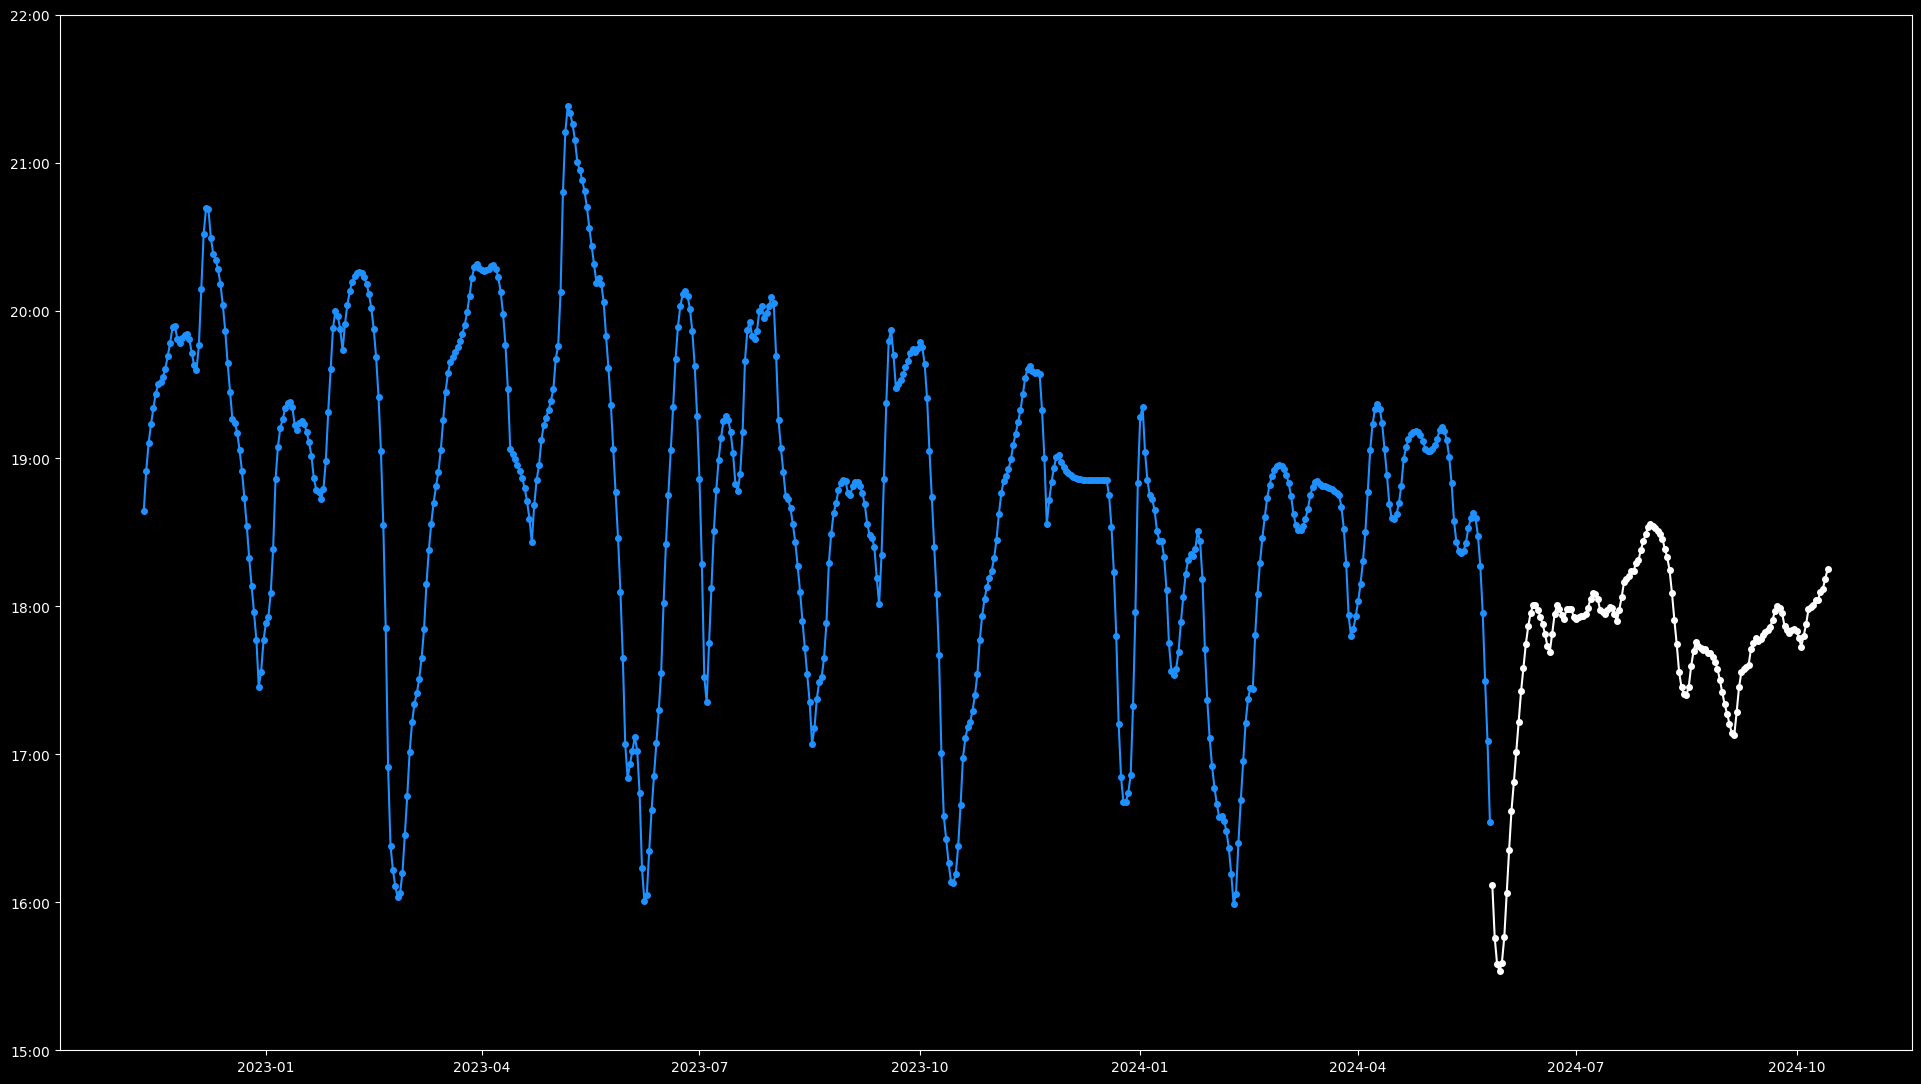

In [6]:
sliced_df = kalman_filter_df.loc[:'2024-05-26']

forecaster = SARIMAX(
    order=(2, 0, 0), 
    seasonal_order=(0, 1, 1, 77),
)

forecaster.fit(sliced_df)
fh = ForecastingHorizon(pd.date_range(start='2024-05-27', end='2024-10-14'))
y_pred = forecaster.predict(fh)

fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(sliced_df, y_pred, ax=ax, colors=['dodgerblue', 'white'])
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='', ylim=(15, 22))
plt.show()

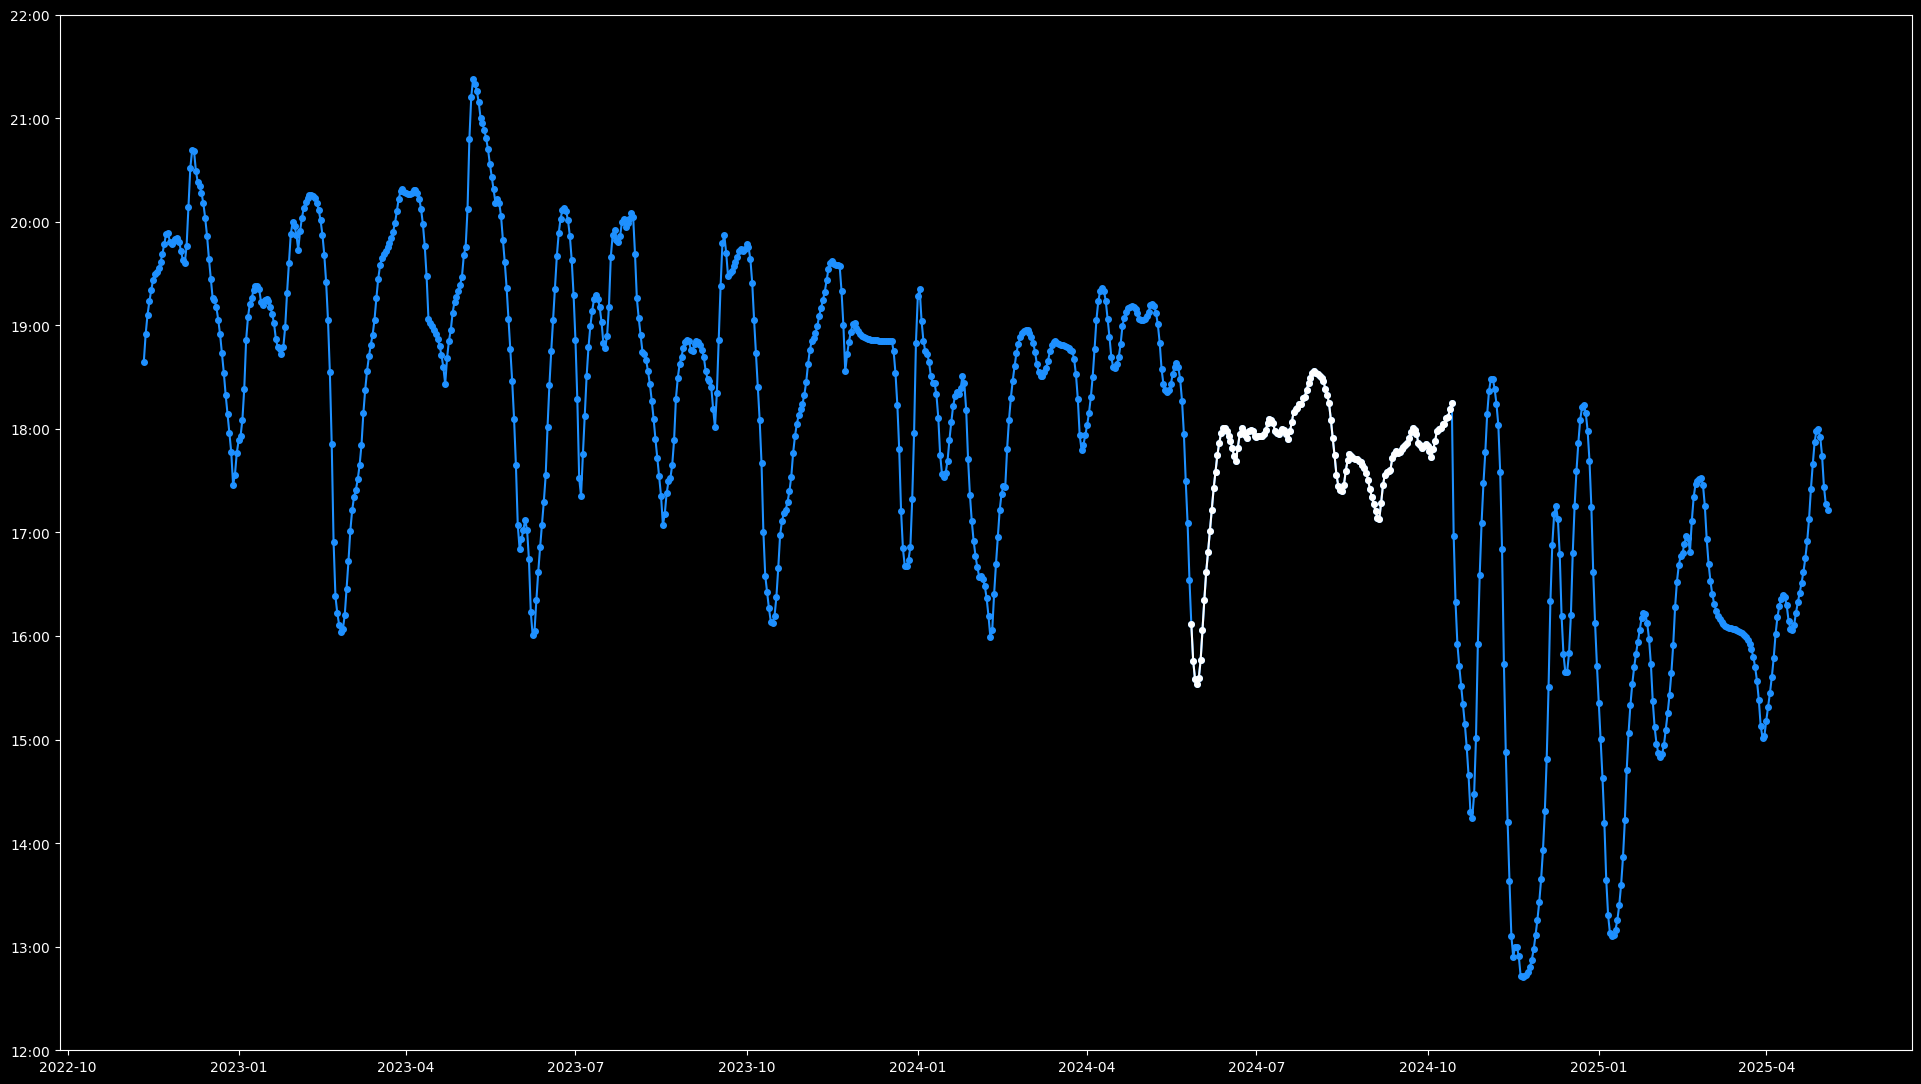

In [7]:
kalman_filter_df.update(y_pred)

fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(kalman_filter_df, y_pred, ax=ax, colors=['dodgerblue', 'white'])
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='', ylim=(12, 22))
plt.show()

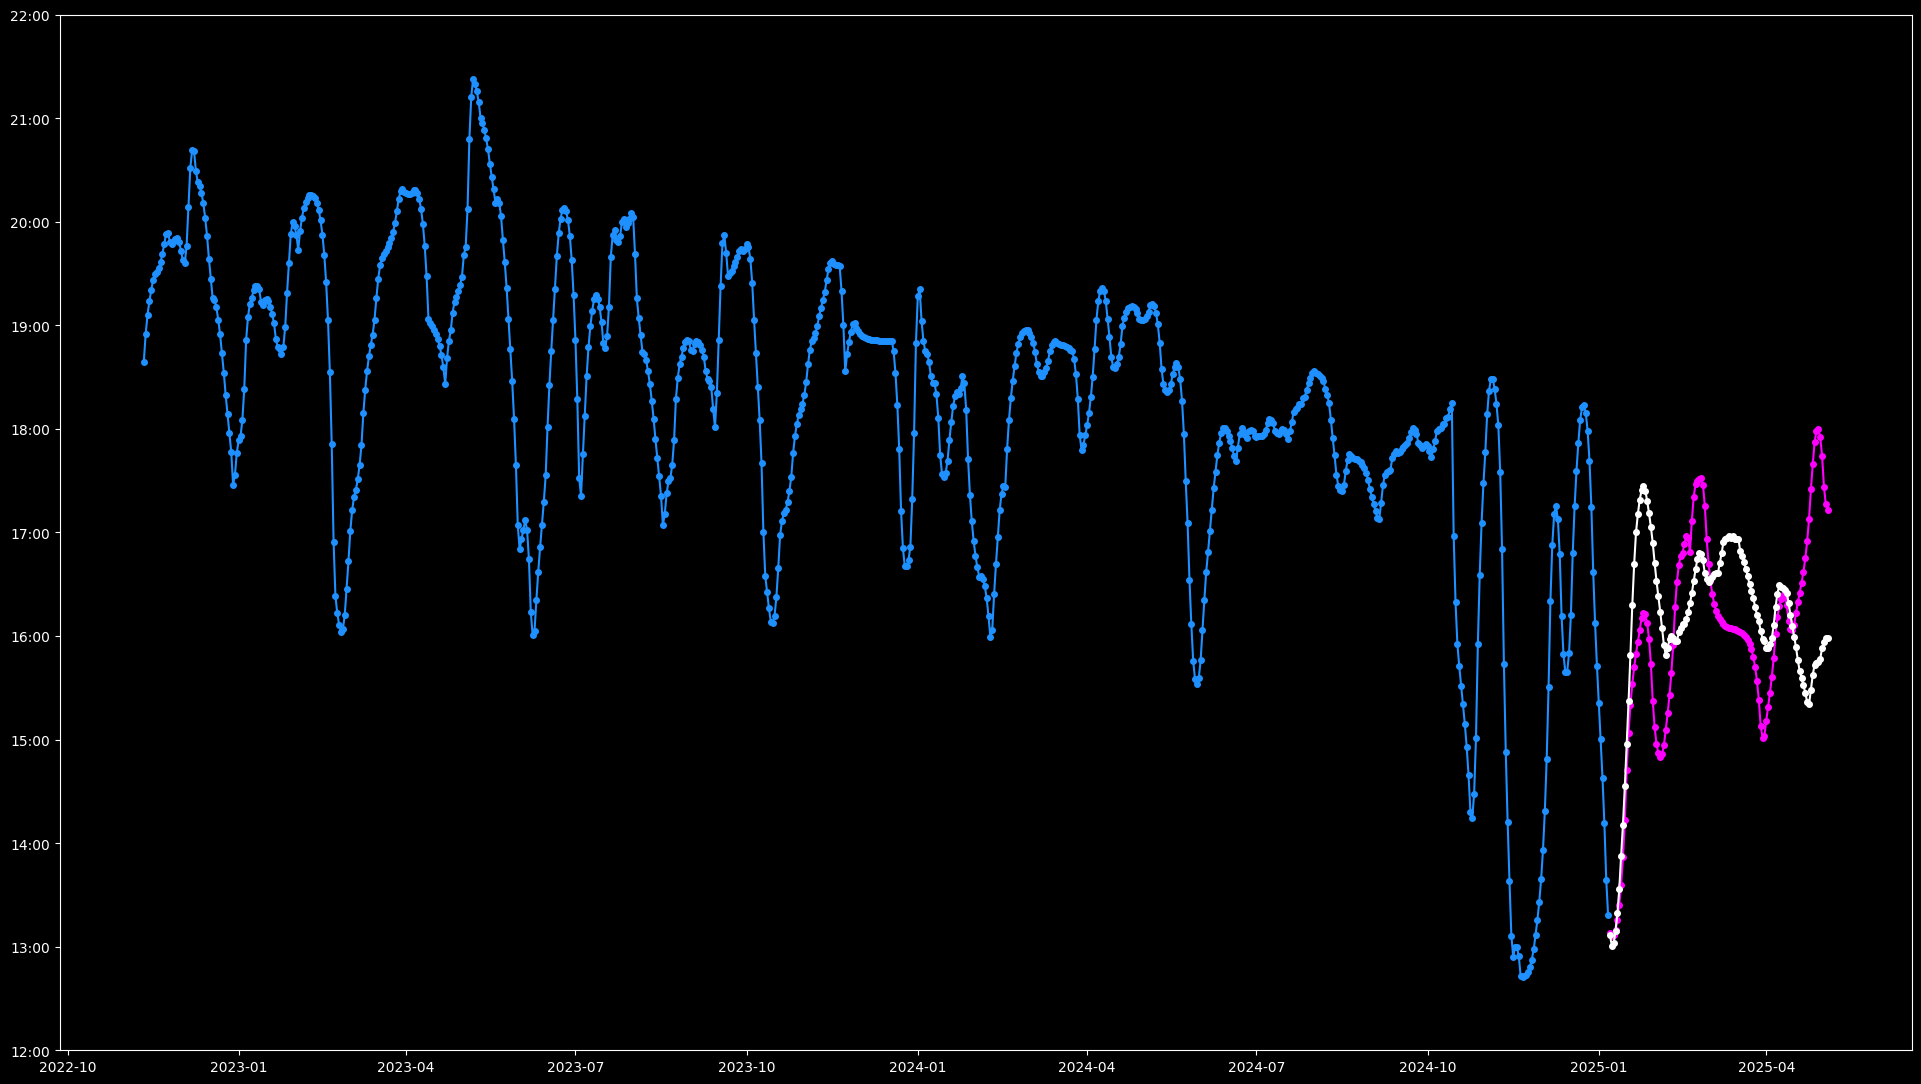

time    4.723829
dtype: float64

In [8]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(kalman_filter_df, test_size=118)

forecaster = SARIMAX(
    order=(2, 0, 0), 
    seasonal_order=(0, 1, 1, 77),
)

forecaster.fit(y_train)
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)

fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(y_train, y_test, y_pred, ax=ax, colors=['dodgerblue', 'magenta', 'white'])
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='', ylim=(12, 22))
plt.show()

def mape(y_true, y_pred): 
    return (abs((y_true - y_pred) / y_true)).mean() * 100

mape(y_pred, y_test)

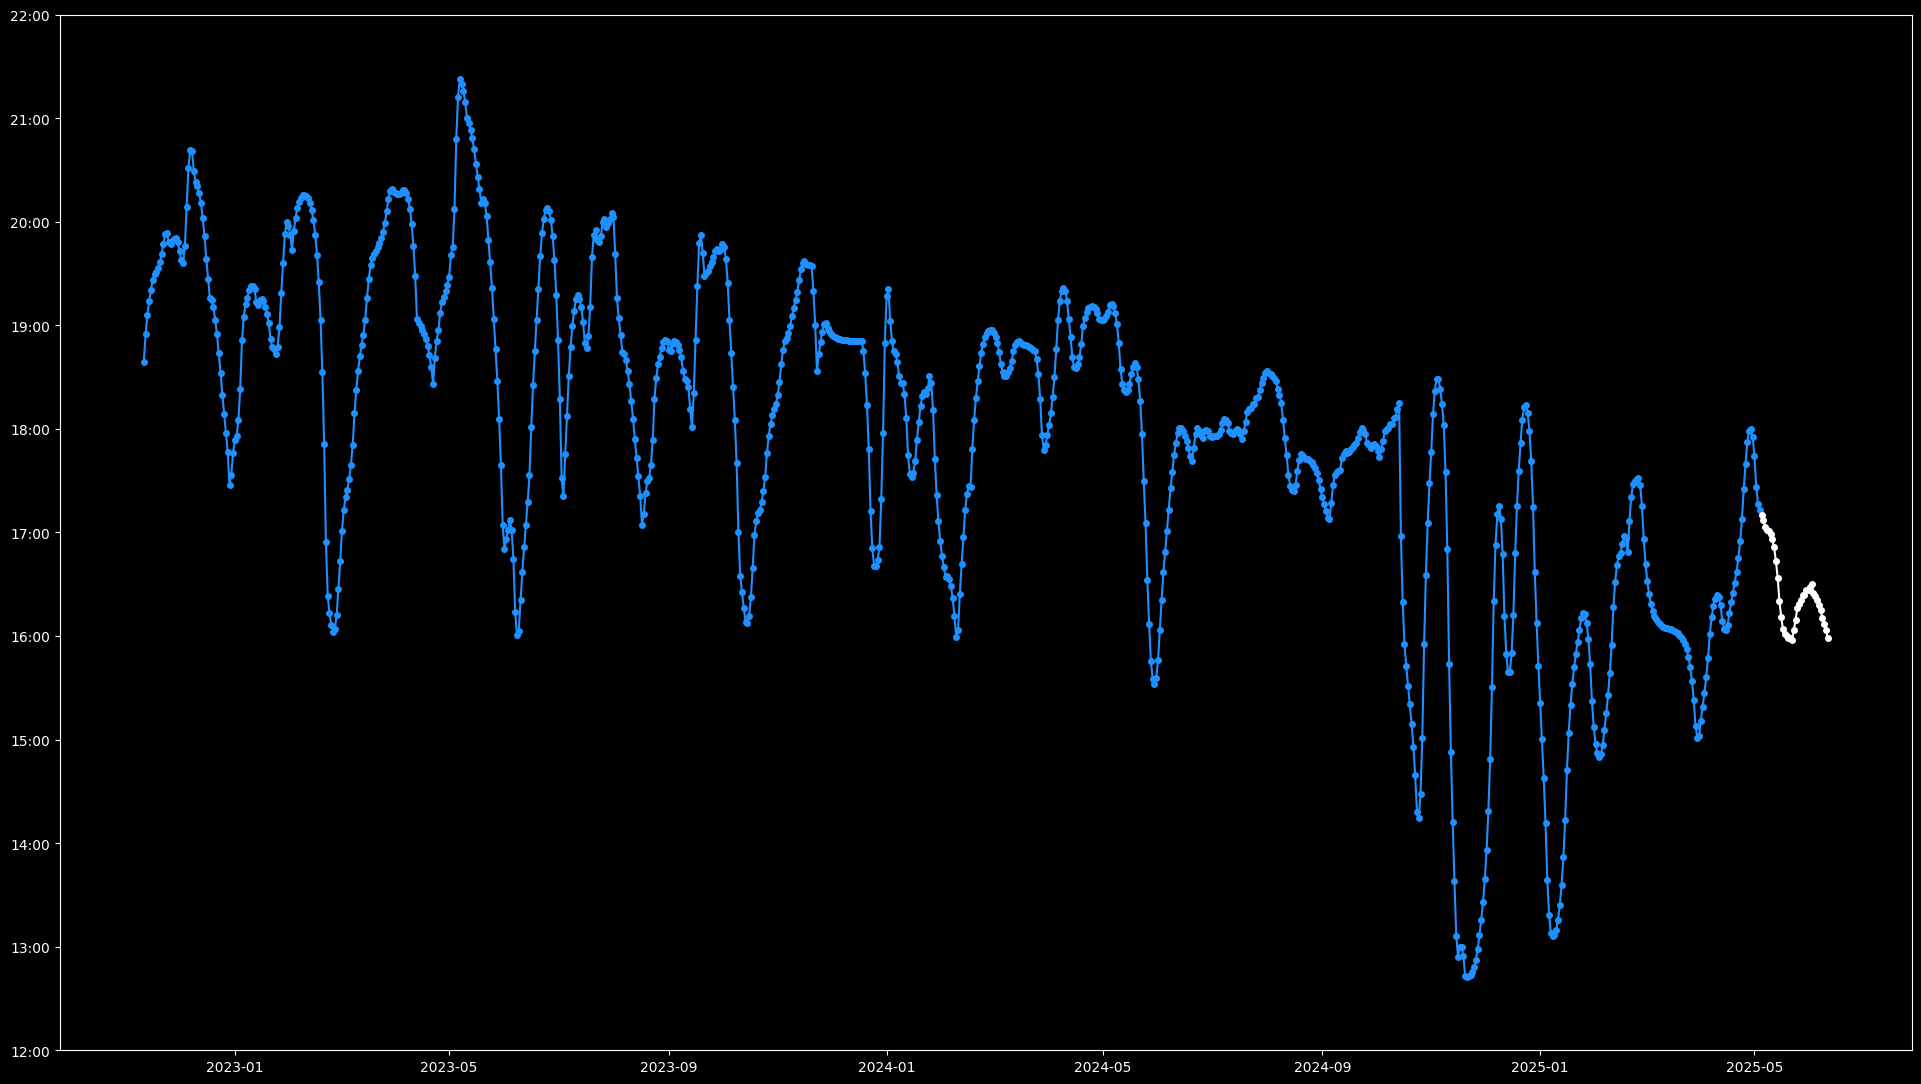

In [9]:
forecaster = SARIMAX(
    order=(2, 0, 0), 
    seasonal_order=(0, 1, 1, 77),
)

forecaster.fit(kalman_filter_df)
fh = ForecastingHorizon(pd.date_range(start='2025-05-05', end='2025-06-11'))
y_pred = forecaster.predict(fh)

fig, ax = plt.subplots(figsize=(23.9, 13.45))
plot_series(kalman_filter_df, y_pred, ax=ax, colors=['dodgerblue', 'white'])
ax.set(yticks=yticks, yticklabels=[f"{y}:00" for y in yticks], ylabel='', ylim=(12, 22))
plt.show()